In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.applications import VGG16
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.applications import Xception, VGG19, MobileNet, VGG16, EfficientNetB0
from keras.models import Model
from keras.layers import GlobalAveragePooling2D
from sklearn.feature_selection import SelectKBest
from sklearn.discriminant_analysis import StandardScaler
from sklearn.feature_selection import f_classif
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [2]:
base_dir = "F:\Resources & Codes\Lab Dataset\Bangladeshi Crops Dataset\BangladeshiCrops\Crop___Disease\Corn"
image_size = 224
batch_size = 32

In [3]:
feature_extraction_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

In [4]:
all_images = []
all_labels = []

for class_folder in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_folder)
    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = keras.preprocessing.image.load_img(img_path, target_size=(image_size, image_size))
            img_array = keras.preprocessing.image.img_to_array(img)
            all_images.append(img_array)
            all_labels.append(class_folder)


In [5]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(all_labels)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    all_images, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [7]:
X_train = np.reshape(X_train, (-1, image_size, image_size, 3))

In [8]:
train_data = feature_extraction_datagen.flow(
    X_train, keras.utils.to_categorical(y_train), batch_size=batch_size, shuffle=False
)

In [9]:
X_test = np.reshape(X_test, (-1, image_size, image_size, 3))

In [10]:
test_data = feature_extraction_datagen.flow(
    X_test, keras.utils.to_categorical(y_test), batch_size=batch_size, shuffle=False
)

In [11]:
print(X_train)
print(X_test)

[[[[112. 104. 117.]
   [111. 103. 116.]
   [110. 102. 115.]
   ...
   [ 48.  50.  26.]
   [ 73.  73.  49.]
   [ 47.  45.  20.]]

  [[111. 103. 116.]
   [111. 103. 116.]
   [110. 102. 115.]
   ...
   [ 52.  54.  30.]
   [ 58.  56.  31.]
   [ 55.  51.  26.]]

  [[111. 103. 116.]
   [111. 103. 116.]
   [110. 102. 115.]
   ...
   [ 60.  58.  35.]
   [ 57.  51.  27.]
   [ 69.  63.  37.]]

  ...

  [[148. 136. 146.]
   [146. 134. 144.]
   [145. 133. 143.]
   ...
   [ 80. 100.  65.]
   [ 83. 103.  68.]
   [ 87. 107.  72.]]

  [[147. 135. 145.]
   [146. 134. 144.]
   [144. 132. 142.]
   ...
   [ 82. 102.  67.]
   [ 82. 102.  67.]
   [ 83. 103.  68.]]

  [[146. 134. 144.]
   [146. 134. 144.]
   [144. 132. 142.]
   ...
   [ 85. 105.  70.]
   [ 81. 101.  66.]
   [ 78.  98.  63.]]]


 [[[126. 169.  87.]
   [124. 167.  85.]
   [127. 170.  91.]
   ...
   [156. 189. 120.]
   [160. 193. 124.]
   [157. 190. 121.]]

  [[123. 166.  84.]
   [124. 167.  85.]
   [126. 169.  90.]
   ...
   [154. 187. 118.]
 

In [12]:
print(y_train)
print(y_test)

[3 2 1 ... 3 2 0]
[2 3 0 3 0 3 0 2 2 1 2 3 2 0 3 0 2 2 2 0 2 3 1 1 0 0 0 3 2 0 2 3 3 3 0 2 0
 1 1 2 2 3 1 3 0 3 2 0 1 0 1 3 3 0 2 2 0 0 0 2 1 1 0 1 3 3 1 0 3 0 2 0 2 0
 2 2 2 1 2 3 0 0 2 0 2 3 2 3 2 2 0 0 2 3 0 3 3 1 3 0 3 0 3 2 2 1 2 2 2 2 2
 2 0 3 2 3 0 2 0 2 1 3 1 0 1 2 2 1 0 2 1 0 0 0 0 3 3 3 0 3 1 2 2 0 3 2 0 0
 2 3 0 1 0 2 0 3 3 2 0 3 3 2 0 0 2 1 0 2 0 2 3 2 2 1 1 0 2 0 3 0 0 2 1 3 2
 0 2 3 0 3 3 2 1 3 0 3 3 2 1 0 1 0 2 3 3 1 2 0 1 3 2 1 3 3 2 2 3 2 0 3 2 2
 3 3 0 2 2 0 0 3 2 2 3 2 1 3 3 1 2 2 1 0 0 1 0 2 2 3 2 0 0 0 1 2 3 3 0 3 0
 0 3 2 0 3 1 0 0 0 3 2 1 2 0 2 3 2 3 3 2 1 3 0 3 2 0 2 3 1 1 3 0 3 0 2 1 2
 2 3 0 2 0 3 3 2 2 2 1 0 2 2 3 3 0 1 1 1 2 0 0 0 3 1 0 0 2 0 0 0 2 1 2 0 1
 3 0 0 2 2 2 2 3 3 0 3 1 3 3 2 3 2 3 2 3 0 2 0 2 2 1 1 0 3 3 1 0 2 0 1 0 3
 3 0 3 0 0 1 3 2 2 0 2 3 1 2 3 0 3 0 2 2 0 0 3 0 0 2 0 2 3 0 1 2 3 0 1 3 0
 2 0 1 0 2 3 3 1 2 0 0 3 0 2 2 1 0 0 3 0 3 0 3 2 0 2 3 3 2 0 2 0 2 1 2 1 0
 3 0 1 2 3 0 3 3 2 2 0 2 3 0 0 2 3 3 2 0 1 3 0 0 2 2 0 3 1 3 3 2 2 3 0 1 2
 0 2 3 

In [13]:
# Define a function for feature extraction using a pre-trained model
def extract_features(model, X_data):
    base_model = model(weights='imagenet', include_top=False)
    model = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))

    features = []
    for img in X_data:
        img = np.expand_dims(img, axis=0)
        features.append(model.predict(img))

    return np.vstack(features)

# Define the models
models = [Xception, VGG19, MobileNet, VGG16, EfficientNetB0]

# Initialize lists to store extracted features
X_train_features = []
X_test_features = []

# Extract features using each model
for model in models:
    X_train_features.append(extract_features(model, X_train))
    X_test_features.append(extract_features(model, X_test))

# Convert lists to numpy arrays
X_train_features = np.concatenate(X_train_features, axis=1)
X_test_features = np.concatenate(X_test_features, axis=1)

# Standardize the features
scaler = StandardScaler()
X_train_features_std = scaler.fit_transform(X_train_features)
X_test_features_std = scaler.fit_transform(X_test_features)


1/1 [==============================] - 0s 59ms/step


In [14]:
# Perform ANOVA analysis
k_best = SelectKBest(f_classif, k='all')
X_train_selected = k_best.fit_transform(X_train_features_std, y_train)
X_test_selected = k_best.transform(X_test_features_std)  # Use transform instead of fit_transform

# Print selected features
selected_features_indices = np.where(k_best.get_support())[0]
print("Selected Features Indices:", selected_features_indices)

d:\Python\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   0   65   74  102  115  119  125  138  150  151  157  191  199  243
  250  254  281  312  315  328  336  352  360  389  402  430  438  441
  454  464  468  472  473  498  513  517  523  552  558  562  582  583
  609  615  616  622  655  656  663  682  721  728  738  753  755  775
  776  781  791  796  813  829  866  878  893  920  921  924  935  946
  965 1013 1023 1026 1031 1049 1056 1062 1129 1215 1232 1235 1247 1248
 1310 1332 1333 1340 1341 1347 1348 1353 1358 1359 1365 1373 1415 1420
 1440 1472 1474 1512 1517 1533 1544 1577 1588 1594 1614 1644 1657 1677
 1699 1710 1713 1728 1765 1773 1788 1796 1807 1871 1887 1889 1907 1908
 1929 1939 1948 1956 1963 1983 2007 2029 2042] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
d:\Python\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid valu

Selected Features Indices: [   0    1    2 ... 5373 5374 5375]



Support Vector Machine (SVM)

In [15]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_selected, y_train)

# Predict on test set
svm_pred = svm_classifier.predict(X_test_selected)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Classifier Accuracy:", svm_accuracy * 100)

SVM Classifier Accuracy: 96.75745784695201


Precision, Recall, and F1 score for SVM

In [16]:
svm_predictions = svm_classifier.predict(X_test_selected)

svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1 Score:", svm_f1)


SVM Precision: 0.9681375198155354
SVM Recall: 0.9675745784695201
SVM F1 Score: 0.967750376329887


Logistic Regression

In [17]:
logreg = LogisticRegression(random_state=42,max_iter=1000)

history = logreg.fit(X_train_selected, y_train)

# Save the trained model to a file
joblib.dump(logreg, 'logistic_regression_model.joblib')

# Load the saved model
loaded_model = joblib.load('logistic_regression_model.joblib')

# Predict on the test set using the loaded model
predictions = loaded_model.predict(X_test_selected)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Logistic Regression Test Accuracy:", accuracy * 100)

Logistic Regression Test Accuracy: 97.01686121919585


Precision, Recall, and F1 score for Logistic Regression

In [18]:
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.970445246891108
Recall: 0.9701686121919585
F1 Score: 0.970268270397169


DNN

In [19]:
# One-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=4)
y_test_one_hot = to_categorical(y_test, num_classes=4)

# Define the DNN model
def build_dnn_model(input_dim, num_of_classes):
    model = Sequential([
        Dense(256, activation='relu', input_dim=input_dim),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_of_classes, activation='softmax')  # Use 'softmax' for multi-class classification
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Check the number of features after ANOVA feature selection
num_selected_features = len(selected_features_indices)

# Build the DNN model
dnn_model = build_dnn_model(num_selected_features, 4)

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint('model_checkpoint.h5', 
                             monitor='val_accuracy', 
                             save_best_only=True, 
                             mode='max', 
                             verbose=1)

# Train the DNN model with one-hot encoded labels
history = dnn_model.fit(X_train_selected, y_train_one_hot,
                        epochs=100,
                        batch_size=32,
                        validation_data=(X_test_selected, y_test_one_hot), callbacks=[checkpoint])

Epoch 1/100
97/97 [==============================] - ETA: 0s - loss: 0.3541 - accuracy: 0.8981
Epoch 1: val_accuracy improved from -inf to 0.95850, saving model to model_checkpoint.h5
97/97 [==============================] - 5s 25ms/step - loss: 0.3541 - accuracy: 0.8981 - val_loss: 0.1210 - val_accuracy: 0.9585
Epoch 2/100
90/97 [==========================>...] - ETA: 0s - loss: 0.2190 - accuracy: 0.9524
Epoch 2: val_accuracy did not improve from 0.95850
97/97 [==============================] - 1s 8ms/step - loss: 0.2154 - accuracy: 0.9529 - val_loss: 0.1341 - val_accuracy: 0.9546
Epoch 3/100
97/97 [==============================] - ETA: 0s - loss: 0.1159 - accuracy: 0.9649
Epoch 3: val_accuracy did not improve from 0.95850
97/97 [==============================] - 1s 7ms/step - loss: 0.1159 - accuracy: 0.9649 - val_loss: 0.1636 - val_accuracy: 0.9572
Epoch 4/100
92/97 [===========================>..] - ETA: 0s - loss: 0.0945 - accuracy: 0.9745
Epoch 4: val_accuracy improved from 0.958

Precision, Recall, and F1 score for DNN

In [20]:
# Predict on the test set using the DNN model
dnn_predictions = dnn_model.predict(X_test_selected)
dnn_predictions = np.argmax(dnn_predictions, axis=1)  # Convert one-hot encoded predictions to class labels

dnn_precision = precision_score(y_test, dnn_predictions, average='weighted')
dnn_recall = recall_score(y_test, dnn_predictions, average='weighted')
dnn_f1 = f1_score(y_test, dnn_predictions, average='weighted')

print("DNN Precision:", dnn_precision)
print("DNN Recall:", dnn_recall)
print("DNN F1 Score:", dnn_f1)


25/25 [==============================] - 0s 2ms/step
DNN Precision: 0.967338633866346
DNN Recall: 0.9675745784695201
DNN F1 Score: 0.9674351983340707


Plot training and validation accuracy

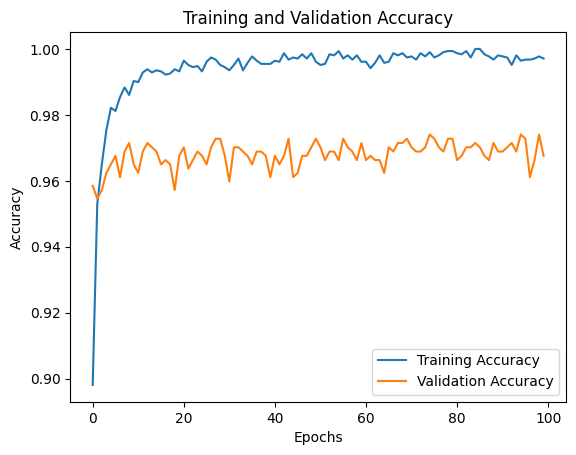

In [21]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Plot training and validation loss

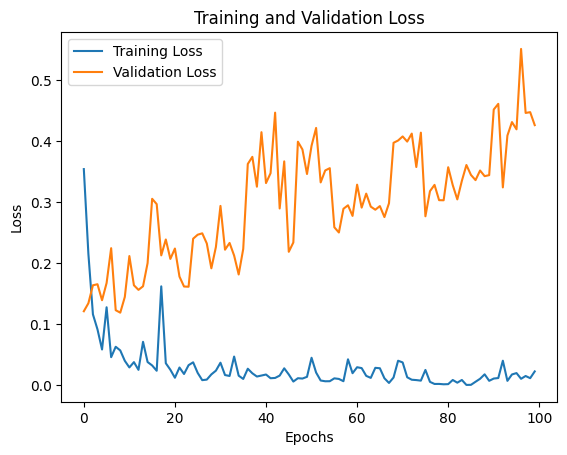

In [22]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()